---

## **Projeto - Cancelamento de Clientes**

### **Desafio**:  
Uma empresa com mais de 800 mil clientes, recentemente percebeu que na sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

---

## Passos do Projeto ##

Passo 1 - Importar o DataFrame

Passo 2 - Visualizar o DataFrame

Passo 3 - Corrigir erros no DataFrame

Passo 4 - Analisar os cancelamentos

Passo 5 - Analisar as causas dos cancelamentos, como as colunas impactam nos cancelamentos

Passo 6 - Fazer uma análise preditiva para melhorar e impedir futuros cancelamentos

---


**Passo 1 - Importar o DataFrame**

---

In [104]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataframe
df_cancelamentos = pd.read_csv("cancelamentos.csv", sep=",")

display(df_cancelamentos)

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
881661,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


---

**Passo 2 - Visualizar o DataFrame**

---

In [105]:
# Usando shape para conferir as dimensões do dataframe
df_cancelamentos.shape

(881666, 12)

In [106]:
# Conferindo os tipos de dados utilizados no dataframe com dtypes
df_cancelamentos.dtypes

CustomerID                float64
idade                     float64
sexo                       object
tempo_como_cliente        float64
frequencia_uso            float64
ligacoes_callcenter       float64
dias_atraso               float64
assinatura                 object
duracao_contrato           object
total_gasto               float64
meses_ultima_interacao    float64
cancelou                  float64
dtype: object

In [107]:
# Visualizando as informações do dataframe com info
df_cancelamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              881664 non-null  float64
 1   idade                   881664 non-null  float64
 2   sexo                    881664 non-null  object 
 3   tempo_como_cliente      881663 non-null  float64
 4   frequencia_uso          881663 non-null  float64
 5   ligacoes_callcenter     881664 non-null  float64
 6   dias_atraso             881664 non-null  float64
 7   assinatura              881661 non-null  object 
 8   duracao_contrato        881663 non-null  object 
 9   total_gasto             881664 non-null  float64
 10  meses_ultima_interacao  881664 non-null  float64
 11  cancelou                881664 non-null  float64
dtypes: float64(9), object(3)
memory usage: 80.7+ MB


In [108]:
# Verificar se existe valores ausentes no dataframe
df_cancelamentos.isna().sum()

CustomerID                2
idade                     2
sexo                      2
tempo_como_cliente        3
frequencia_uso            3
ligacoes_callcenter       2
dias_atraso               2
assinatura                5
duracao_contrato          3
total_gasto               2
meses_ultima_interacao    2
cancelou                  2
dtype: int64

In [109]:
# Verificar se existe valores duplicados no dataframe
df_cancelamentos.duplicated().sum()

np.int64(440828)

In [110]:
# Fazer uma análise descritiva do dataframe
df_cancelamentos.describe()

,CustomerID,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
count,881664.000000,881664.000000,881663.000000,881663.000000,881664.000000,881664.000000,881664.000000,881664.000000,881664.000000
mean,225398.667955,39.373153,31.256312,15.807496,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.845091,12.442362,17.255713,8.586241,3.070216,8.258058,240.802865,8.596203,0.495476
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [111]:
# Verificar quais os tipos de valores descritos na coluna Assinatura
assinaturas = df_cancelamentos.groupby("assinatura")["cancelou"].max()

assinaturas

assinatura
Basic       1.0
Premium     1.0
Standard    1.0
Name: cancelou, dtype: float64

In [112]:
# Verificar quais os tipos de valores descritos na coluna Duração Contrato
duracao_contrato = df_cancelamentos.groupby("duracao_contrato")["cancelou"].max()

duracao_contrato

duracao_contrato
Annual       1.0
Monthly      1.0
Quarterly    1.0
Name: cancelou, dtype: float64

Com o dataframe verificado, constatou-se que existe 881.664 registros no dataframe. As colunas numéricas são preenchidas com números inteiros (int), porém o tipo de dado dos campos estão em decimais (float). Também há colunas com valores nulos ou vazios e há também 440.828 registros duplicados. Foi feito também um agrupamento das colunas assinatura e duração do contrato (as únicas colunas de texto) para verificar quais os tipos de valores em que estas colunas são preenchidas.

---

**Passo 3 - Corrigir erros no DataFrame e remodelar os dados**

---

In [113]:
# Excluir coluna CustomerID (coluna desnessária para análise)
df_cancelamentos = df_cancelamentos.drop(columns="CustomerID")

display(df_cancelamentos.head(5))

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [114]:
# Exluir valores nulos e vazios
df_cancelamentos = df_cancelamentos.dropna()

df_cancelamentos.isna().sum()

idade                     0
sexo                      0
tempo_como_cliente        0
frequencia_uso            0
ligacoes_callcenter       0
dias_atraso               0
assinatura                0
duracao_contrato          0
total_gasto               0
meses_ultima_interacao    0
cancelou                  0
dtype: int64

In [115]:
# Excluir valores duplicados
df_cancelamentos = df_cancelamentos.drop_duplicates()

df_cancelamentos.duplicated().sum()

np.int64(0)

In [116]:
# Fazer uma análise descritiva do dataframe
df_cancelamentos.describe()

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [117]:
# Alterar o tipo das colunas float para int
df_cancelamentos[['idade', 'tempo_como_cliente', 'frequencia_uso', 'ligacoes_callcenter', 'dias_atraso', 'total_gasto', 
                  'meses_ultima_interacao', 'cancelou']] = df_cancelamentos[['idade', 'tempo_como_cliente', 
                                                                             'frequencia_uso', 'ligacoes_callcenter', 
                                                                             'dias_atraso', 'total_gasto', 
                                                                             'meses_ultima_interacao', 
                                                                             'cancelou']].astype(int)

df_cancelamentos.dtypes

idade                      int64
sexo                      object
tempo_como_cliente         int64
frequencia_uso             int64
ligacoes_callcenter        int64
dias_atraso                int64
assinatura                object
duracao_contrato          object
total_gasto                int64
meses_ultima_interacao     int64
cancelou                   int64
dtype: object

In [118]:
# Substituir os valores da coluna sexo
df_cancelamentos["sexo"] = df_cancelamentos["sexo"].replace({
    "Male": "Masculino",
    "Female": "Feminino"
})


In [119]:
# Substituir os valores da coluna assinatura
df_cancelamentos["assinatura"] = df_cancelamentos["assinatura"].replace({
    "Basic": "Básico",
    "Premium": "Prêmio",
    "Standard": "Padrão"
})


In [120]:
# Substituir os valores da coluna duração do contrato
df_cancelamentos["duracao_contrato"] = df_cancelamentos["duracao_contrato"].replace({
    "Annual": "Anual",
    "Monthly": "Mensal",
    "Quarterly": "Trimestral"
})


In [121]:
# Substituir os valores da coluna cancelou
df_cancelamentos["cancelou"] = df_cancelamentos["cancelou"].replace({
    0: "Não",
    1: "Sim"
})

In [122]:
# Visualizar o novo dataframe totalmente limpo e modelado
novo_df_cancelamentos = df_cancelamentos

display(novo_df_cancelamentos)

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30,Feminino,39,14,5,18,Padrão,Anual,932,17,Sim
1,65,Feminino,49,1,10,8,Básico,Mensal,557,6,Sim
2,55,Feminino,14,4,6,18,Básico,Trimestral,185,3,Sim
3,58,Masculino,38,21,7,7,Padrão,Mensal,396,29,Sim
4,23,Masculino,32,20,5,8,Básico,Mensal,617,20,Sim
...,...,...,...,...,...,...,...,...,...,...,...
440844,52,Feminino,21,6,3,26,Prêmio,Mensal,830,19,Sim
440847,24,Masculino,4,9,4,22,Padrão,Trimestral,204,4,Sim
440850,47,Masculino,41,14,1,5,Prêmio,Anual,151,19,Sim
440851,24,Masculino,44,13,5,4,Prêmio,Mensal,669,13,Sim


Dataframe limpo, corrigido e remodelado. Agora o dataframe possui 440.832 registros, 0 valores nulos e duplicados e dados de texto remodelados para português. 

In [123]:
# Função para codificar o valor da coluna Cancelou (0 para Não e 1 para Sim) quando necessário 
# para cálculos matemáticos
def codificar_cancelamento():
    if novo_df_cancelamentos["cancelou"].dtypes == object:
       novo_df_cancelamentos["cancelou"] = novo_df_cancelamentos["cancelou"].replace({
           "Não": 0,
           "Sim": 1
        })
    else: 
       novo_df_cancelamentos["cancelou"] = novo_df_cancelamentos["cancelou"].replace({
          0: "Não",
          1: "Sim"
        })

---

**Passo 4 - Análise dos dados**

---

In [124]:
# Análise da Taxa de Cancelamentos

# quantas pessoas cancelaram e quantas não cancelaram
display(novo_df_cancelamentos["cancelou"].value_counts())

# em percentual
display(novo_df_cancelamentos["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

cancelou
Sim    249999
Não    190833
Name: count, dtype: int64

cancelou
Sim    56.7%
Não    43.3%
Name: proportion, dtype: object

Na primeira análise é possível verificar que houve um percentual de 56,7% de cancelamentos dos clientes.

In [125]:
# Análise do Cancelamento por Contrato

# Contagem da duração dos contratos
display(novo_df_cancelamentos["duracao_contrato"].value_counts())

# Contagem da duração dos contratos em percentual
display(novo_df_cancelamentos["duracao_contrato"].value_counts(normalize=True).map("{:.1%}".format))

duracao_contrato
Anual         177198
Trimestral    176530
Mensal         87104
Name: count, dtype: int64

duracao_contrato
Anual         40.2%
Trimestral    40.0%
Mensal        19.8%
Name: proportion, dtype: object

Nesta análise, podemos observar que a categoria Mensal é a menos contratada com apenas 19.8% dos contratos, com a Anual e Trimestral empatados com 40%, podendo dar a entender que a mensal pode ser a mais cancelada.

In [126]:
# Análise das Informações dos Contratos

# Codificar a coluna cancelou para valor numérico
codificar_cancelamento()

contrato_mensal = novo_df_cancelamentos.groupby("duracao_contrato").mean(numeric_only=True)

display(contrato_mensal)

C:\Users\robso\AppData\Local\Temp\ipykernel_3504\2062564134.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  novo_df_cancelamentos["cancelou"] = novo_df_cancelamentos["cancelou"].replace({


,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
duracao_contrato,,,,,,,,
Anual,38.842188,31.446213,15.880207,3.263395,12.465135,651.385439,14.236120,0.460761
Mensal,41.552282,30.538701,15.499162,4.985649,15.007198,550.510355,15.478038,1.000000
Trimestral,38.830896,31.419838,15.886642,3.265247,12.460891,651.113845,14.234515,0.460256


Com as informações agrupadas, é possível notar que os clientes do plano  Mensal,  possuem  uma  média  de  cancelamento  igual  a  1, ou  seja,  como visto na análise anterior, que supostamente preveu que praticamente  todos  os  clientes  que  utilizam  esse  plano, fizeram o cancelamento do serviço.

In [127]:
# Removendo o Contrato Mensal -> Agora que descobrimos que o contrato mensal não é bom para a empresa, iremos fazer 
# uma previsão do comportamento dos dados sem o Contrato Mensal

# Codificar os valores da coluna cancelou para valor texto
codificar_cancelamento()

# Fazer a previsão dos cancelamentos sem o Contrato Mensal
previsao_contrato = novo_df_cancelamentos[novo_df_cancelamentos["duracao_contrato"] != "Mensal"]
display(previsao_contrato)
display(previsao_contrato["cancelou"].value_counts())
display(previsao_contrato["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30,Feminino,39,14,5,18,Padrão,Anual,932,17,Sim
2,55,Feminino,14,4,6,18,Básico,Trimestral,185,3,Sim
5,51,Masculino,33,25,9,26,Prêmio,Anual,129,8,Sim
6,58,Feminino,49,12,3,16,Padrão,Trimestral,821,24,Sim
7,55,Feminino,37,8,4,15,Prêmio,Anual,445,30,Sim
...,...,...,...,...,...,...,...,...,...,...,...
440830,26,Masculino,35,27,1,5,Padrão,Trimestral,977,9,Não
440831,28,Masculino,55,14,2,0,Padrão,Trimestral,602,2,Não
440832,31,Masculino,48,20,1,14,Prêmio,Trimestral,567,21,Não
440847,24,Masculino,4,9,4,22,Padrão,Trimestral,204,4,Sim


cancelou
Não    190833
Sim    162895
Name: count, dtype: int64

cancelou
Não    53.9%
Sim    46.1%
Name: proportion, dtype: object

A previsão nos mostra que a proporção de cancelamentos caiu em 46.1%, mas esse número ainda é considerado alto.

In [128]:
# Análise das Assinaturas do Contrato

# Renomear os valores da coluna cancelou para valor numérico
codificar_cancelamento()

#Percentual das Assinaturas do Contrato
display(novo_df_cancelamentos["assinatura"].value_counts(normalize=True).map("{:.1%}".format))

# Média das Assinaturas do Contrato por agrupamento
display(novo_df_cancelamentos.groupby("assinatura").mean(numeric_only=True))

C:\Users\robso\AppData\Local\Temp\ipykernel_3504\2062564134.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  novo_df_cancelamentos["cancelou"] = novo_df_cancelamentos["cancelou"].replace({


assinatura
Padrão    33.8%
Prêmio    33.7%
Básico    32.4%
Name: proportion, dtype: object

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
assinatura,,,,,,,,
Básico,39.458756,31.935347,15.808678,3.652196,13.026310,628.407793,14.488492,0.581782
Padrão,39.341016,30.976859,15.804564,3.585316,12.956420,632.857927,14.478817,0.560700
Prêmio,39.323040,30.883460,15.809293,3.577671,12.916766,632.652363,14.475592,0.559417


Na análise percentual, podemos verificar que temos praticamente a mesma quantidade em cada uma das assinaturas, ou seja, 
temos  praticamente  1/3  em  cada assinatura, e na análise da média os valores de cancelamento também são muito parecidos.

---

**Passo 5 - Visualização dos Dados**

---

In [129]:
# Codificar coluna cancelou para texto
codificar_cancelamento()

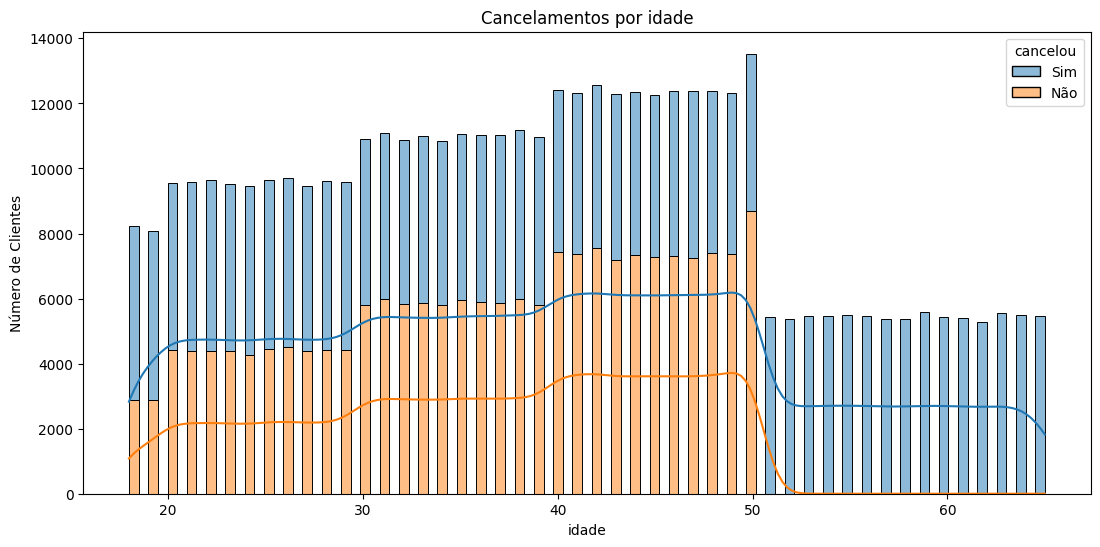

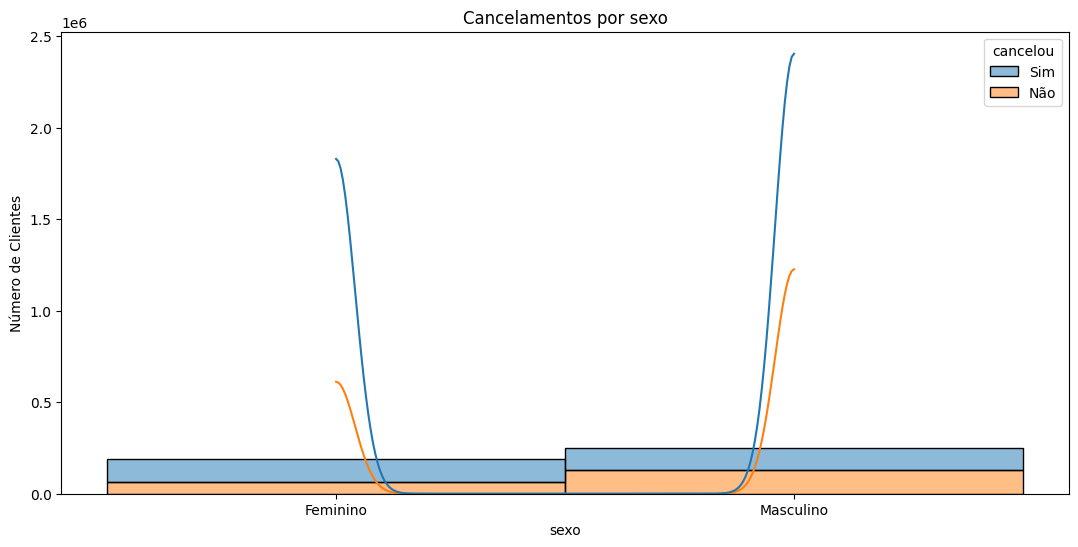

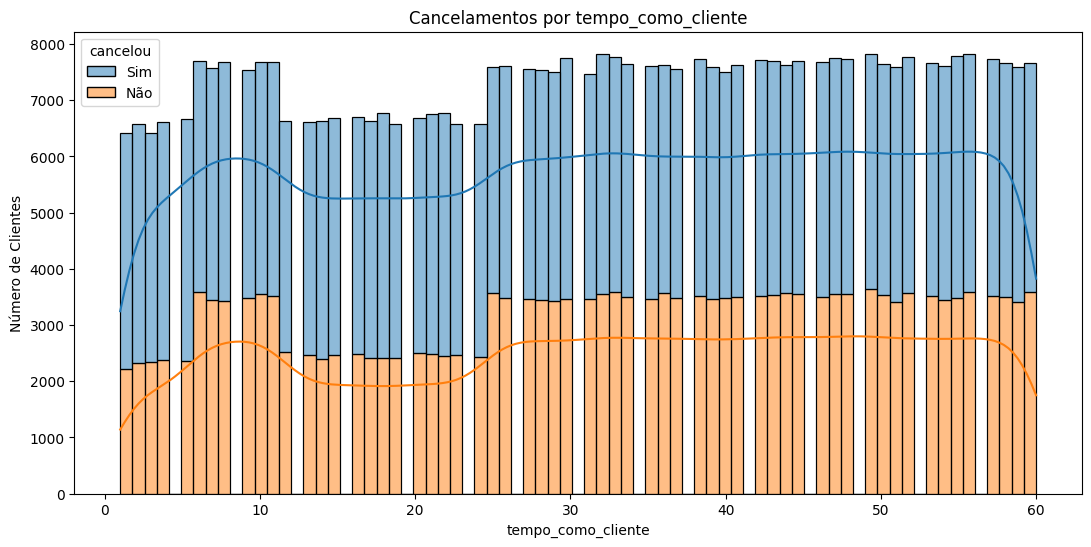

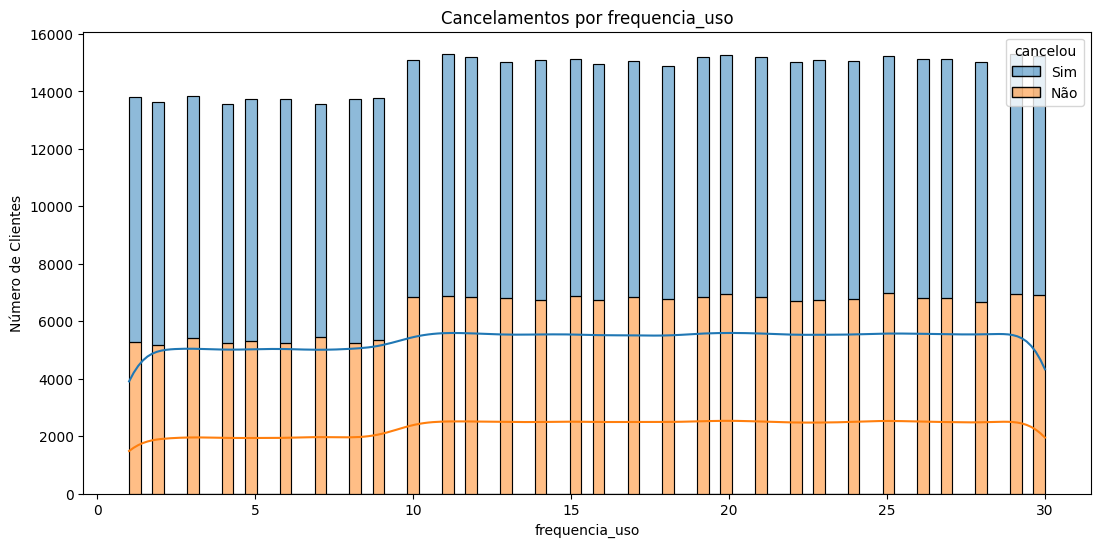

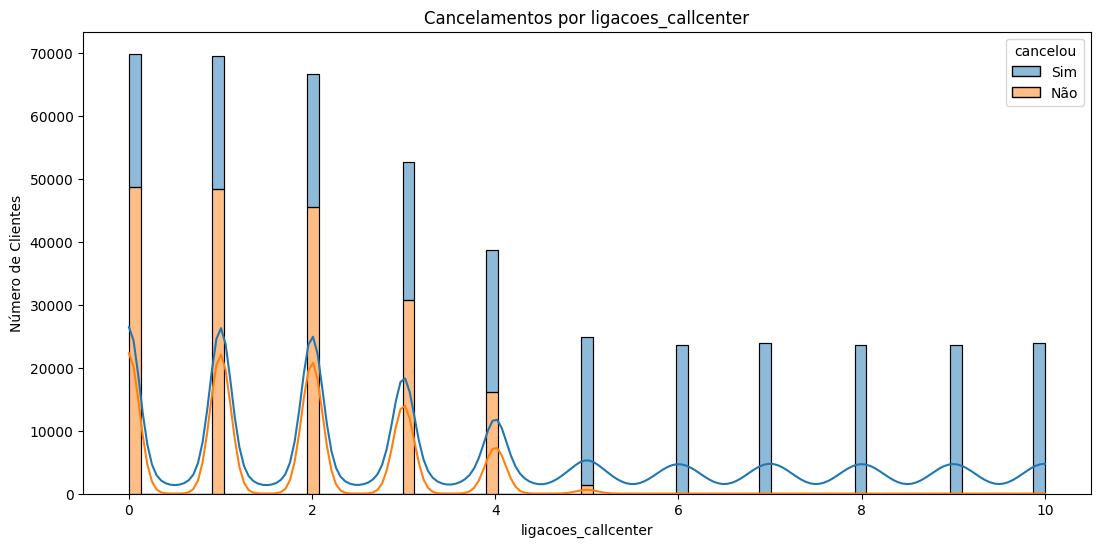

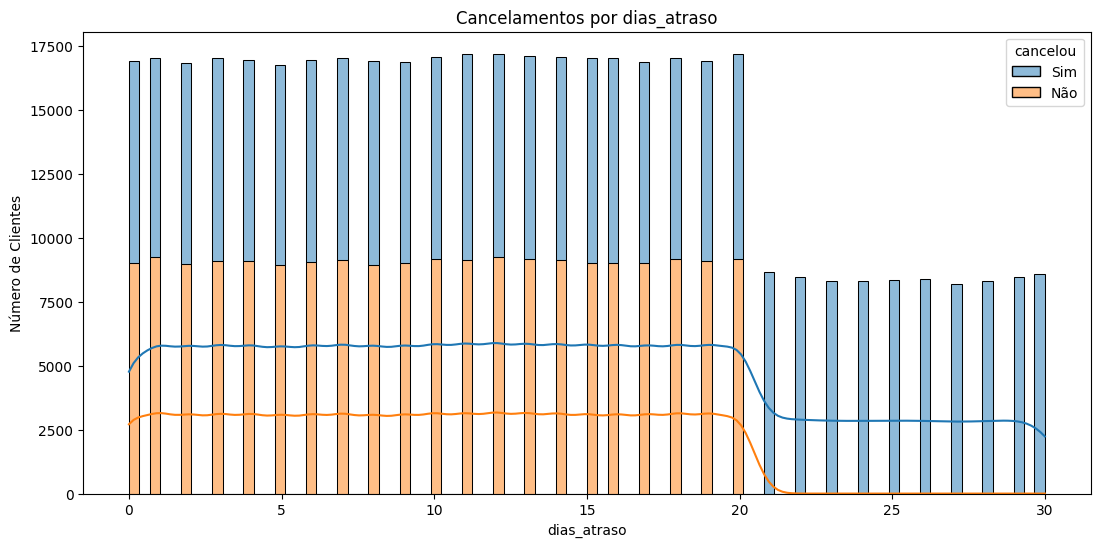

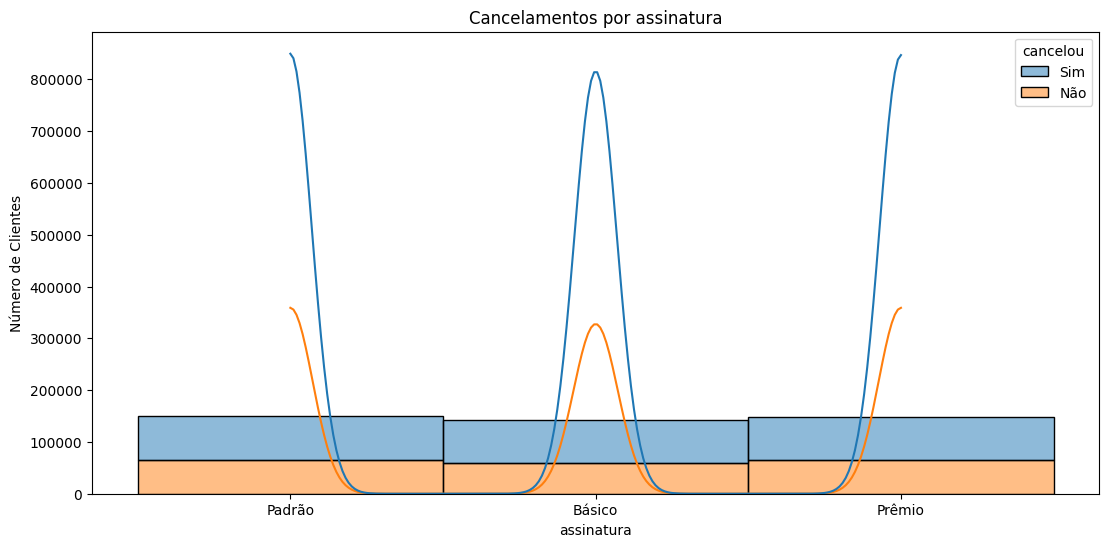

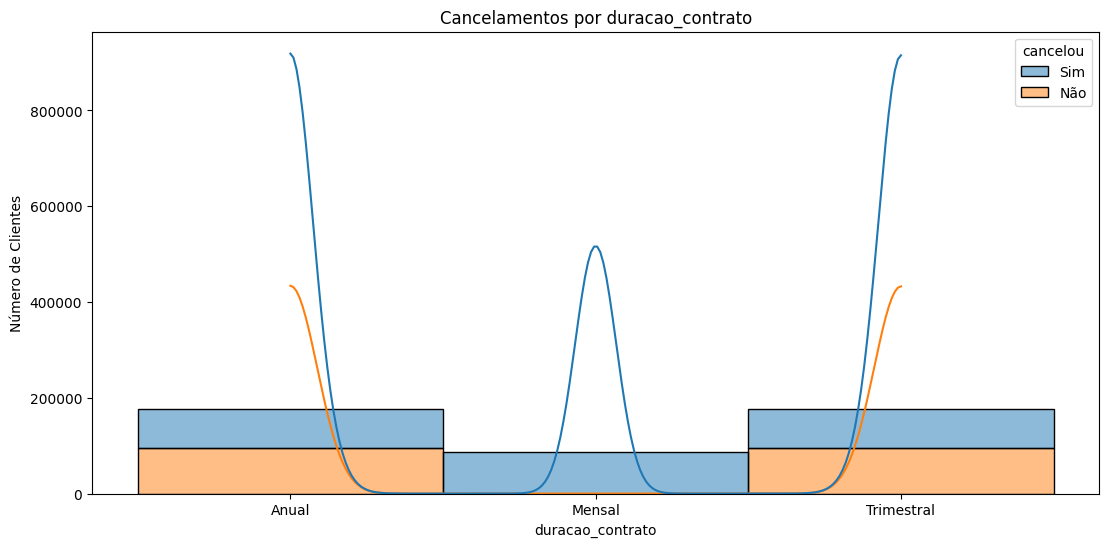

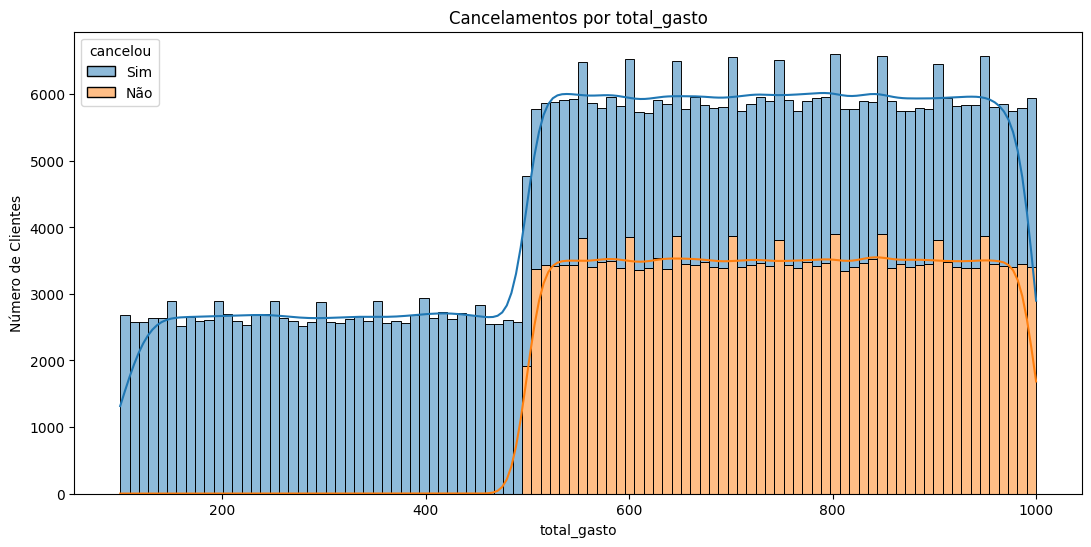

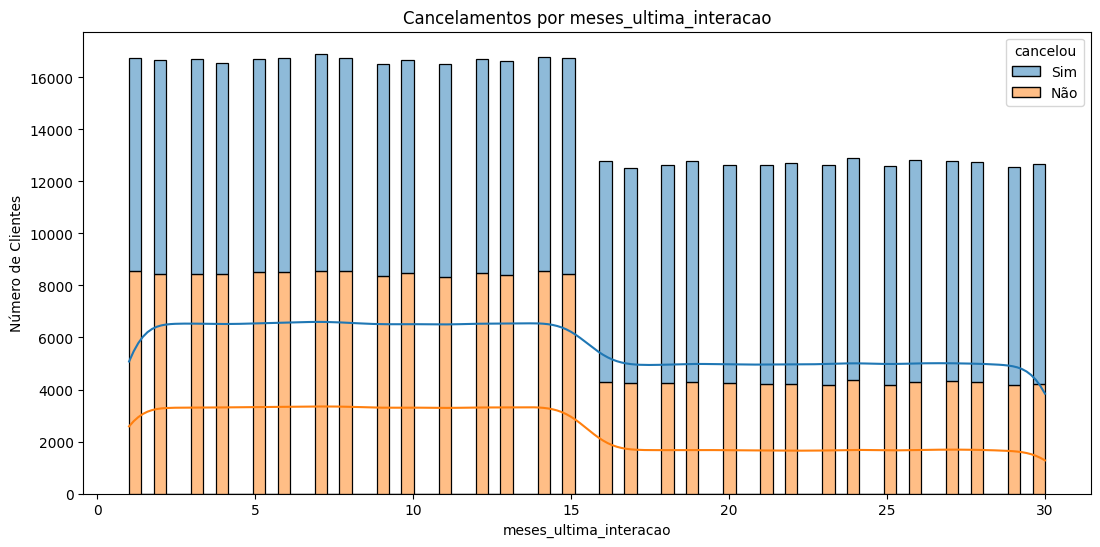

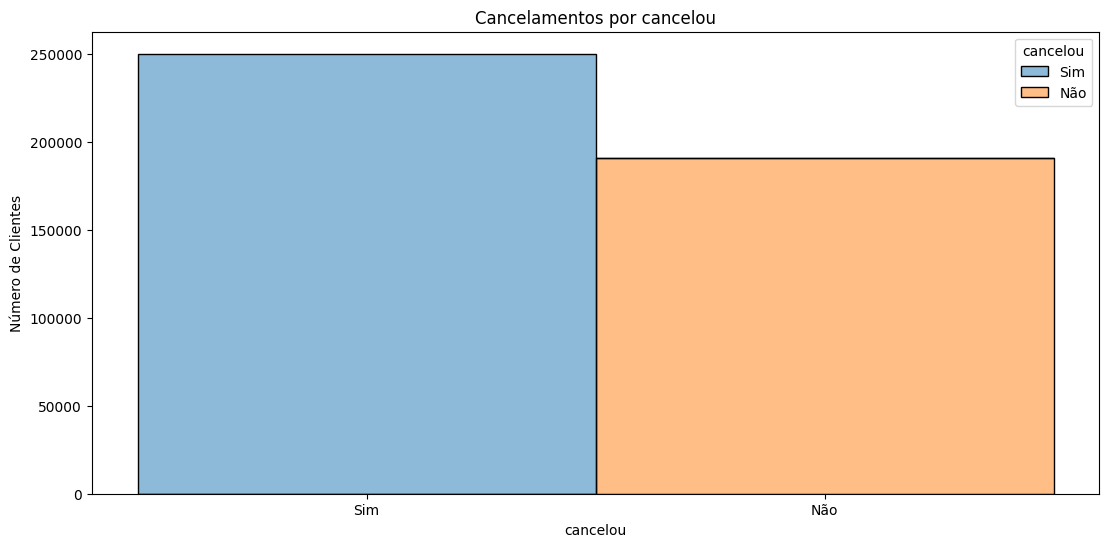

In [130]:
## Visualização e Análise Gráfica dos Cancelamentos

# Criação dos Gráficos
for coluna in novo_df_cancelamentos.columns:
    # Configuração da figura
    plt.figure(figsize=(13, 6))

    # Gráficos de Histogrma - Cancelamentos Vs Variáveis
    sns.histplot(data=novo_df_cancelamentos, x=coluna, hue="cancelou", kde=True, multiple="stack")
    plt.title("Cancelamentos por " + coluna)
    plt.xlabel(coluna)
    plt.ylabel("Número de Clientes")

    plt.tight_layout
    plt.show()

---

**Passo 6 - Fazer uma análise preditiva para melhorar e impedir futuros cancelamentoss**

---

In [131]:
# Criação de um novo dataframe para a análise preditiva
df_previsao = novo_df_cancelamentos

# Sugestões de acordo com a visualização dos dados, para novas tomadas de decisões e assim diminuir
# o cancelamento dos clientes:

# Clientes com mais de 50 anos de idade cancelaram
# -> Coletar informações com clientes acima dos 50 anos e descobrir o que os levam a cancelar e assim criar 
# produtos específicos para essa faixa de idade
df_previsao = df_previsao[df_previsao["idade"] <= 50]

# Clientes do sexo feminino possuem mais cancelamentos
# -> Coletar informações com mulheres para descobrir o que as levam a cancelar e poder criar 
# produtos específicos para elas
df_previsao = df_previsao[(df_previsao["sexo"] == "Feminino") & 
                          (df_previsao["cancelou"] != "Sim") | (df_previsao["sexo"] == "Masculino")]

# Clientes com frequência de uso acima de 10 tem maiores tendências de cancelar
# -> Verificar o feedback dos clientes que usam mais os serviços da empresa
df_previsao = df_previsao[df_previsao["frequencia_uso"] <= 10]

# Clientes do contrato mensal, TODOS cancelaram
# -> Ofercer desconto nos planos anuais e trimestrais
df_previsao = df_previsao[df_previsao["duracao_contrato"] !="Mensal"]

# Clientes que ligam mais do que 4 vezes para o call center, cancelam
# -> Criar um processo para resolver o problema do cliente em no máximo 3 ligações
df_previsao = df_previsao[df_previsao["ligacoes_callcenter"] <=4]

# Clientes que atrasaram mais de 20 dias, cancelaram
# -> Política para resolver atrasos em até 10 dias (equipe financeira)
df_previsao = df_previsao[df_previsao["dias_atraso"] <=20]

# Nova previsão do comportamento dos dados seguindo as sugestões descritas acima 

# Nova contagem preditiva
display(df_previsao["cancelou"].value_counts())

# Novo percentual preditivo
display(df_previsao["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

# Prévia de como o dataframe ficaria com as novas sugestões
display(df_previsao)

cancelou
Não    54188
Sim     4107
Name: count, dtype: int64

cancelou
Não    93.0%
Sim     7.0%
Name: proportion, dtype: object

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
62,32,Masculino,3,5,1,6,Padrão,Anual,282,20,Sim
100,32,Masculino,13,6,4,11,Básico,Anual,649,8,Sim
135,36,Feminino,5,6,0,6,Prêmio,Trimestral,787,9,Não
166,22,Masculino,39,3,4,16,Padrão,Anual,443,4,Sim
187,32,Feminino,35,9,1,15,Prêmio,Trimestral,951,4,Não
...,...,...,...,...,...,...,...,...,...,...,...
440802,46,Masculino,50,10,0,8,Prêmio,Trimestral,551,17,Não
440815,44,Feminino,45,3,3,13,Básico,Anual,776,12,Não
440819,35,Masculino,55,3,2,11,Padrão,Trimestral,607,30,Não
440821,45,Masculino,3,9,1,7,Prêmio,Anual,796,26,Não


---

**Conclusão da Análise de Dados do Projeto Cancelamento de Clientes**

---

De acordo com a análise exploratória preliminar, a empresa começou com 56.7% de cancelamentos. Com mais algumas análises exploratórias conseguimos reduzir para 53.9%. Visualizando através dos gráficos, foi possível criar alguns cenários preditivos que nos resultou em uma taxa de 7.0% de cancelamentos. Baseado nas sugestões que os gráficos mostraram, o principais vilões dos cancelamentos são:

1 - Atendimento Call Center, onde se encontra o maior motivo para cancelamentos. Esse é um setor que envolve recursos humanos, que pode ser resolvido com reuniões, treinamentos e técnicas voltadas para este serviço. Provavelmente resolvendo esse problema, os cancelamentos envolvidos com o sexo feminino e com a idade acima de 50 anos, podem também ser resolvidos aqui, uma vez que mulheres e pessoas mais velhas também utilizam o call center.

2 - Duração do Contrato, onde todos cancelaram no plano mensal. Aqui o problema pode ser resolvido com melhores preços nos outros dois contratos, mesmo que pague um pouquinho mais caro, para o cliente é melhor se organizar e pagar um contrato de maior tempo e à vista.

3 - E por último o Atraso nos Pagamentos com mais de 20 dias. Aqui o problema pode estar relacionado com questões de juros e moras que acabam inviabilizando o pagamento por parte do cliente, forçando o mesmo a cancelar. Políticas para antecipação de pagamento, descontos para pagamentos antecipados, entre outras medidas, podem contribuir para menos cancelamentos do cliente.

---

## **Projeto - Cancelamento de Clientes**

### **Inteligência Artificial e Previsões**:  
**Concluída uma análise aprofundada nos dados e com insights valiosos extraídos, vamos aproveitar esses insights e aplicá-los em um modelo de Inteligência Artificial IA, que consiga ler essas novas informações e dizer automaticamente a previsão de cancelamentos para a empresa**

Com o dataframe analisado e com base na análise, criar o modelo de Inteligência Artificial e Previsões.

---

## Passos do Projeto ##

Passo 1 - Preparar o dataframe para a Inteligência Artificial

Passo 2 - Treinar a Inteligência Artificial

Passo 3 - Escolher o melhor modelo

Passo 4 - Usar o melhor modelo

---

In [132]:
# Importando as bibliotecas necessárias
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Criando um novo dataframe para a IA, a partir do dataframe criado na análise preditiva
df_cancelamentos_ia = df_previsao

display(df_cancelamentos_ia)


,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
62,32,Masculino,3,5,1,6,Padrão,Anual,282,20,Sim
100,32,Masculino,13,6,4,11,Básico,Anual,649,8,Sim
135,36,Feminino,5,6,0,6,Prêmio,Trimestral,787,9,Não
166,22,Masculino,39,3,4,16,Padrão,Anual,443,4,Sim
187,32,Feminino,35,9,1,15,Prêmio,Trimestral,951,4,Não
...,...,...,...,...,...,...,...,...,...,...,...
440802,46,Masculino,50,10,0,8,Prêmio,Trimestral,551,17,Não
440815,44,Feminino,45,3,3,13,Básico,Anual,776,12,Não
440819,35,Masculino,55,3,2,11,Padrão,Trimestral,607,30,Não
440821,45,Masculino,3,9,1,7,Prêmio,Anual,796,26,Não


---

**Passo 1 - Preparar o dataframe para a Inteligência Artifical**

---

In [133]:
# Codificar as colunas para tipo numérico para a Inteligência Artificial

# Codificar coluna sexo
codificador_sexo = LabelEncoder()
df_cancelamentos_ia["sexo"] = codificador_sexo.fit_transform(df_cancelamentos_ia["sexo"])

# Codificar coluna assinatura
codificado_assinatura = LabelEncoder()
df_cancelamentos_ia["assinatura"] = codificado_assinatura.fit_transform(df_cancelamentos_ia["assinatura"])

# Codificar coluna duracao_contrato
codificar_duracao = LabelEncoder()
df_cancelamentos_ia["duracao_contrato"] = codificar_duracao.fit_transform(df_cancelamentos_ia["duracao_contrato"])

df_cancelamentos_ia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58295 entries, 62 to 440822
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   58295 non-null  int64 
 1   sexo                    58295 non-null  int64 
 2   tempo_como_cliente      58295 non-null  int64 
 3   frequencia_uso          58295 non-null  int64 
 4   ligacoes_callcenter     58295 non-null  int64 
 5   dias_atraso             58295 non-null  int64 
 6   assinatura              58295 non-null  int64 
 7   duracao_contrato        58295 non-null  int64 
 8   total_gasto             58295 non-null  int64 
 9   meses_ultima_interacao  58295 non-null  int64 
 10  cancelou                58295 non-null  object
dtypes: int64(10), object(1)
memory usage: 5.3+ MB


In [134]:
# Visualização do dataframe após a codificação
display(df_cancelamentos_ia)

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
62,32,1,3,5,1,6,1,0,282,20,Sim
100,32,1,13,6,4,11,0,0,649,8,Sim
135,36,0,5,6,0,6,2,1,787,9,Não
166,22,1,39,3,4,16,1,0,443,4,Sim
187,32,0,35,9,1,15,2,1,951,4,Não
...,...,...,...,...,...,...,...,...,...,...,...
440802,46,1,50,10,0,8,2,1,551,17,Não
440815,44,0,45,3,3,13,0,0,776,12,Não
440819,35,1,55,3,2,11,1,1,607,30,Não
440821,45,1,3,9,1,7,2,0,796,26,Não


In [135]:
# Preparar o dataframe para o treino

# y é a coluna do dataframe a ser prevista
y = df_cancelamentos_ia["cancelou"]

# x são as colunas do dataframe que serão usadas para a previsão
x = df_cancelamentos_ia.drop(columns=["cancelou"])

# Separar os dados de treino e os dados de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)


---

**Passo 2 - Treinar a Inteligência Artificial**

---

In [136]:
# Criar o medelo -> Cancelou: Sim, Não

# Arvore de Decisão -> RandonForest
# Nearest Neighbors -> KNN -> Vizinhos Próximos

# Cria a IA
modelo_arvore_decisao = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

# Treinar a IA
modelo_arvore_decisao.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)

KNeighborsClassifier()

---

**Passo 3 - Escolher o melhor modelo**

---

In [137]:
# Testar os modelos
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

# Calcular a acurácia
display(accuracy_score(y_teste, previsao_arvore_decisao) * 100)
display(accuracy_score(y_teste, previsao_knn) * 100)

99.95425696151867

97.46697924409628

Os dois modelos possuem acurácias bem próximas, acima de 95%, podendo ser utilizados qualquer um dos dois, mas vou utilizar o modelo árvore de decisão por ter chegado próximo a 100%.

---

Passo 4 - Usar melhor modelo

---

In [138]:
# Melhor modelo é Modelo Arvore de Decisão

#Importar os novos clientes para fazer a previsão
df_novos_dados = pd.read_csv("novos_cancelamentos.csv")

# Codificar o novo dataframe

# sexo
df_novos_dados["sexo"] = codificador_sexo.fit_transform(df_novos_dados["sexo"])

# assinatura
df_novos_dados["assinatura"] = codificado_assinatura.fit_transform(df_novos_dados["assinatura"])

# duração contrato
df_novos_dados["duracao_contrato"] = codificar_duracao.fit_transform(df_novos_dados["duracao_contrato"])

# Visualizar o dataframe
display(df_novos_dados)

# Fazer a previsão através do modelo árvore de decisão
nova_previsao = modelo_arvore_decisao.predict(df_novos_dados)

display(nova_previsao)

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0
...,...,...,...,...,...,...,...,...,...,...
350,56.0,0,44.0,11.0,2.0,11.0,2,0,583.0,9.0
351,53.0,0,18.0,21.0,1.0,23.0,0,2,717.0,15.0
352,41.0,0,18.0,27.0,10.0,3.0,0,1,111.0,19.0
353,33.0,1,6.0,12.0,7.0,29.0,2,2,869.0,10.0


array(['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não',

Podemos notar que na previsão dos novos clientes, as chances de cancelamento são muito menores agora.

---

**Quais as caracteristicas mais importantes para definir a diminuição de cancelamentos?**

---

In [139]:
# Características mais importantes para definir os cancelamentos

colunas = list(x_teste.columns)
importancia = pd.DataFrame(index=colunas, data=modelo_arvore_decisao.feature_importances_)
importancia = importancia * 100
print(importancia)

                                0
idade                   11.838226
sexo                     1.591840
tempo_como_cliente      10.752399
frequencia_uso           4.640863
ligacoes_callcenter      8.634467
dias_atraso              0.695251
assinatura               0.629303
duracao_contrato         0.168976
total_gasto             60.189148
meses_ultima_interacao   0.859526


O modelo de IA também nos mostra as características mais importantes para definir a diminuição de cancelamentos pelo cliente. 

Na análise acima é possível notar que as informações de total_gasto, idade, tempo_como_cliente e ligacoes_callcenter são características bem importantes e que merecem atenção para as próximas análises, baseados nos dados futuros.